So, for this project for the machine learning supervise class, where we have to take a data set and do some stuff with it show that we understand either the model or the concept of some of the machine learning. In this note, I will be working with data set about heart failure  and plan to show off using linear regression and multilinear  regression models

In [1]:
%matplotlib inline
import micropip
await micropip.install("pandas")
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
await micropip.install("seaborn")
import seaborn as sns



import statsmodels.formula.api as smf
import statsmodels.api as sm

Matplotlib is building the font cache; this may take a moment.


Below is the dataset you will find that I will be working on in this project, and from what you can see, it mainly has to do with some stuff surrounding heart failure in older people. I mainly want to see how some predictors correlate with each other and see if one is more positive than the other. I have a feeling that smoking and high blood pressure will be the main culprits. If you want to see the dataset for yourself or read the papers on it, I got it from this https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records 
github link :https://github.com/mzandate/Introduction-to-Machine-Learning-Supervised-Learning-finalproject-/upload 

In [11]:


columns = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure'
           ,'platelets','serum_creatinine','serum_sodium','sex','smoking','time','death_event']


df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
plotting = df[['age', 'ejection_fraction', 'serum_creatinine', 'time']]
df.head()
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


For the most part, I just wanted to show that the table is clean and did not have to modify it. Most of the data set is in  numbers, with some binary showing you 1 or 0 for some of them. Also, the data set is not that huge, only about 300 entries in the entire dataset, so managble to work with 
Below are two features I am curious  about: age with diabetes and age with high blood pressure in terms of heart failure. 

In [3]:

model = smf.ols(formula='diabetes ~ age', data=df).fit()
print(model.summary())
model = smf.ols(formula='high_blood_pressure ~ age ', data=df).fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.062
Date:                Thu, 16 Oct 2025   Prob (F-statistic):             0.0812
Time:                        03:34:38   Log-Likelihood:                -211.41
No. Observations:                 299   AIC:                             426.8
Df Residuals:                     297   BIC:                             434.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6733      0.149      4.530      0.0

As you can see above, those two that I was curious about, It did not have good R-square  or p values so which tells us there is not really a strong connection. So figure that the next best thing I can do is to do  the death event since i figure that an important feature in the overall dataset and test to see if that's the one to work with. 

In [4]:

predictors = ['anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','sex','smoking','age ']

best_predictor=''
best_r_squared=0

for colums in predictors:

    model = smf.ols(formula=f'DEATH_EVENT ~ {colums}', data=df).fit()
    print(colums)
    print(model.rsquared)
    print("")
    
    if best_r_squared < model.rsquared:
        best_predictor = colums
        best_r_squared = model.rsquared
                 
print(best_predictor)
print(best_r_squared)

anaemia
0.004391725949931868

creatinine_phosphokinase
0.003934822088648038

diabetes
3.774795686140031e-06

ejection_fraction
0.07214773942906261

high_blood_pressure
0.006296590356718923

platelets
0.002414628346391834

serum_creatinine
0.08659928289877705

sex
1.8631104538147092e-05

smoking
0.0001593439843221578

age 
0.06437817357755793

serum_creatinine
0.08659928289877705


As you can see from the data above, the top 3 predictors for the death event were 1st being serum_creatineine, 2nd being age, and 3rd being ejection fraction.
Here is a description  for each of them to better understand them and the  dataset.
Serum creatine is the amount of level of serum creatinine in the blood in mg/dg 
Age would be the age of the patient
ejection_fraction is the percentage of blood leaving the heart at each contraction

And with these being the important features that I am going to work with in the cells below 





in the cells below i created modles for the death and kept addiing predicionts and see if the r squared value woudl get better with it best pridectiors 

In [5]:

model = smf.ols(formula='DEATH_EVENT  ~ serum_creatinine', data=df).fit()
print(model.summary())

model = smf.ols(formula='DEATH_EVENT  ~ serum_creatinine + ejection_fraction', data=df).fit()
print(model.summary())

bestmodel = smf.ols(formula='DEATH_EVENT  ~ serum_creatinine + ejection_fraction + age ', data=df).fit()
print(bestmodel.summary() )


                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     28.16
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           2.19e-07
Time:                        03:34:38   Log-Likelihood:                -182.98
No. Observations:                 299   AIC:                             370.0
Df Residuals:                     297   BIC:                             377.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1356      0.043  

Well, that was a postive outlook for the R-squared value. It went up quite a bit from .08 to.2 Now were are going to work with it in two Ways to see if we can get it higher and maximize it. The first way is doing fit polynomial regression up to n=20.

In [6]:
best_degree = 1
best_r_squared = 0
power = ''
n = 20

for i in range(n):
    print(i+1)
    power = power + f' + np.power(age,{i+1})+np.power(serum_creatinine,{i+1})+np.power(ejection_fraction,{i+1})'
    model = smf.ols(formula=f'DEATH_EVENT ~ {power}', data=df).fit()


    print(model.rsquared)
    print("")
    
    if best_r_squared < model.rsquared:
        best_degree = i +1
        best_r_squared = model.rsquared
        
    
print(best_degree)
print(best_r_squared)


1
0.20834401930542235

2
0.2916892098163182

3
0.3163111459902941

4
0.3237790579305654

5
0.3310699756544412

6
0.33355256839553693

7
0.33555000794478507

8
0.33496067714974287

9
0.2883334212501961

10
0.28941036793580943

11
0.25242728898372624

12
0.19386408535420774

13
0.25516405699350975

14
0.2061875812862739

15
0.17239433368775814

16
0.1813013033083658

17
0.18260655600222142

18
0.06455837125275554

19
0.008524619928393928

20
-0.003502046239246548

7
0.33555000794478507


As we found out that the best results would be 7th degree to a value of .337, which is a good indicator of death event and its predictors  


next we are going to see if we can normalized the data and see if we can also get it higher that way 

In [7]:
best_degree = 1
best_r_squared = 0 
sound_degree = 1
n = 20
#
df['serum_norm'] = df['serum_creatinine']/df['serum_creatinine'].mean()
deathpwr =''
formula = ''

for i in range(n):
    print(i+1)
    deathpwr = deathpwr + f' + np.power(serum_norm,{i+1})+ np.power(age,{i+1})+np.power(ejection_fraction,{i+1})'
    model = smf.ols(formula=f'DEATH_EVENT~ {deathpwr}', data=df).fit()
    

    print(model.rsquared)
    print("")
    
    if best_r_squared < model.rsquared:
        best_degree = i +1
        best_r_squared = model.rsquared
        bestmodel = model
        formula = deathpwr


print(best_degree)
print(best_r_squared)


1
0.20834401930542235

2
0.2916892098163183

3
0.3163111459902942

4
0.32377905793056405

5
0.33106997565636176

6
0.333552556236678

7
0.33551888502483884

8
0.2923224989619101

9
0.2883592758864939

10
0.2860591021771801

11
0.2504970926253898

12
0.19387011237295648

13
0.25036603744989105

14
0.2048570675951713

15
0.17241129944881628

16
0.18128316180283677

17
0.18266543217615627

18
0.06454767531321948

19
0.008524619928744315

20
-0.003502046239550527

7
0.33551888502483884


we found out the same thign that in the 7th degreee with about the same result of .335

Okay, after doing all of that above, the next thing I want to try is getting rid of the outliers in the data set and seeing if I can increase the R-squared value in a positive way 

reintroduce the model show what we currently have in the multi regression model and how the charts to see what the outliers might be 

                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     8.899
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           1.32e-17
Time:                        03:34:40   Log-Likelihood:                -135.42
No. Observations:                 299   AIC:                             304.8
Df Residuals:                     282   BIC:                             367.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

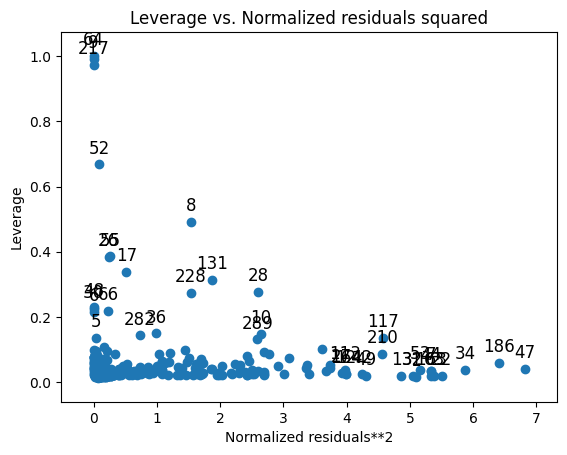

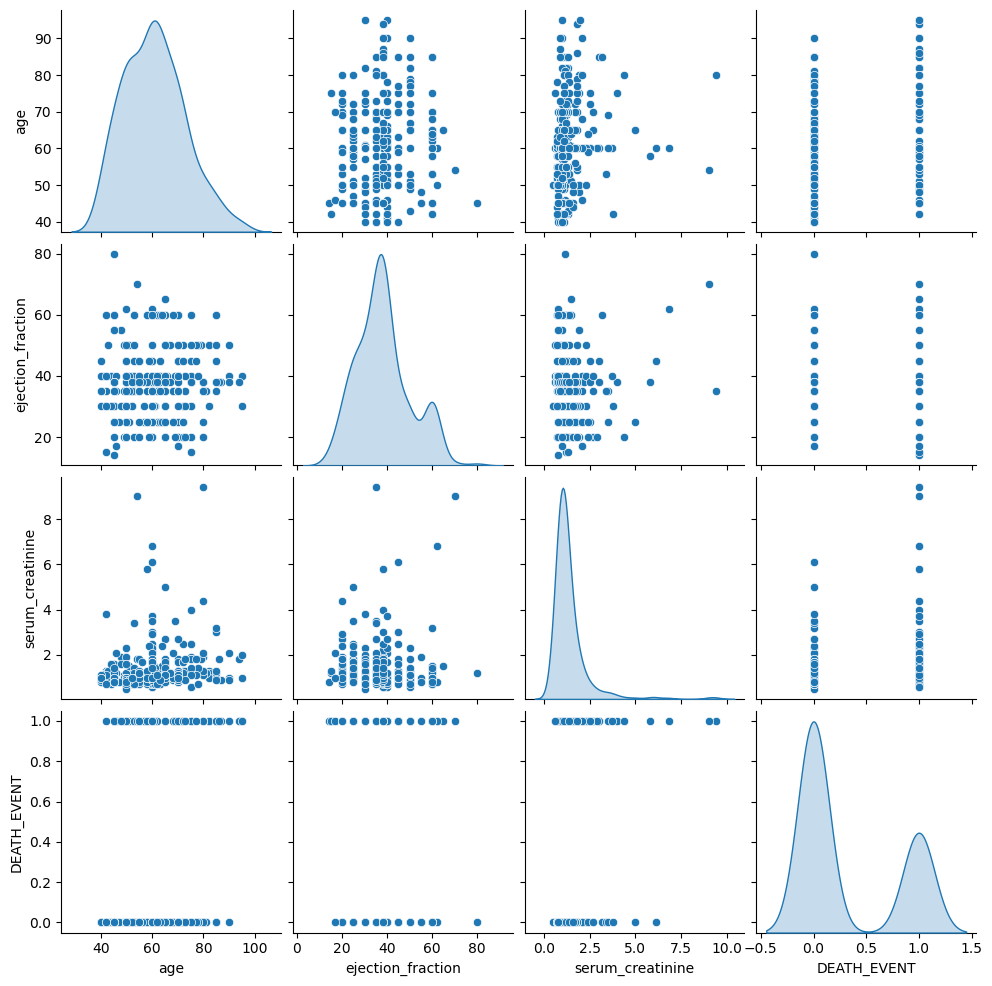

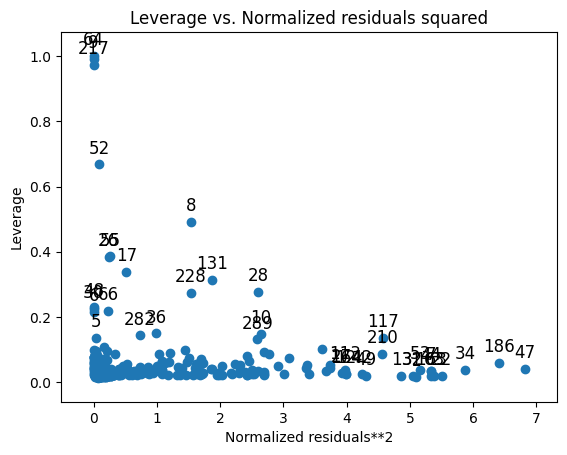

In [8]:
 
plotting = df[['age', 'ejection_fraction', 'serum_creatinine', 'DEATH_EVENT',]]

print(bestmodel.summary())

plotting.describe(include='all')
sns.pairplot(plotting,diag_kind='kde')

sm.graphics.plot_leverage_resid2(bestmodel)



 as you can see from above the outliers i want to try to get rid of 28 and 47 in the first rounds and see if i can get a better r-square value 

                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     9.415
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           1.20e-18
Time:                        03:34:42   Log-Likelihood:                -130.15
No. Observations:                 297   AIC:                             294.3
Df Residuals:                     280   BIC:                             357.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

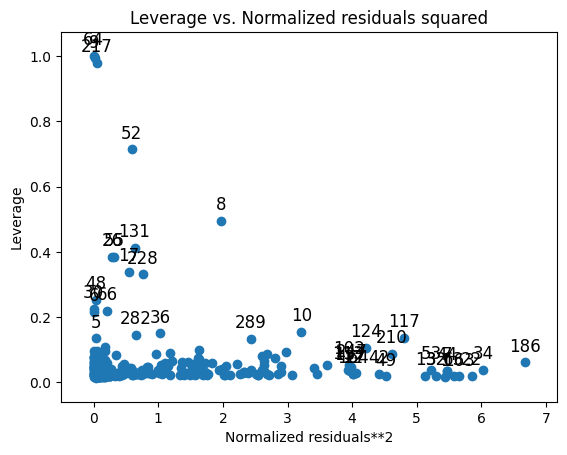

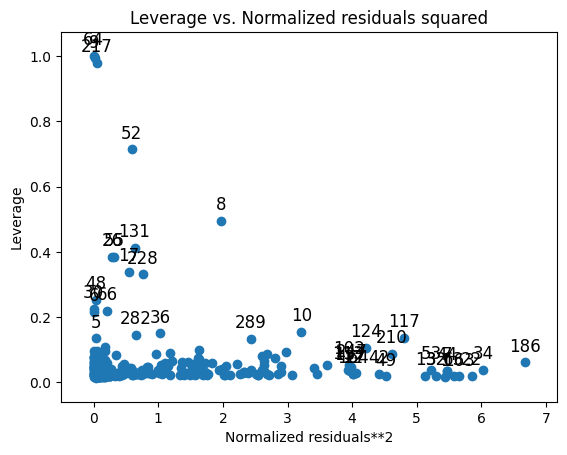

In [9]:
df.drop([28,47], inplace = True)
bestmodel = smf.ols(formula=f'DEATH_EVENT~ {formula}', data=df).fit()
print(bestmodel.summary())
sm.graphics.plot_leverage_resid2(bestmodel)

As we can tell, we managed to take out some outliers and made it better  in the r-squared value, going from .336 to .350, and managed to make the data set better for our current predictors. Now I want to try it again and see if that will help by taking out a couple more points to see if i can get it higher 

                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     9.960
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           1.15e-19
Time:                        03:34:43   Log-Likelihood:                -122.50
No. Observations:                 291   AIC:                             279.0
Df Residuals:                     274   BIC:                             341.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

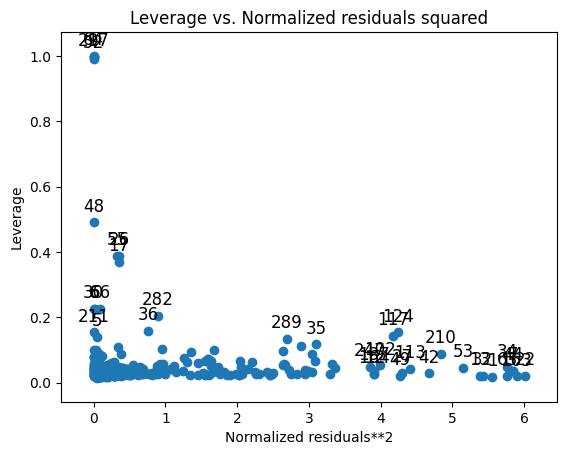

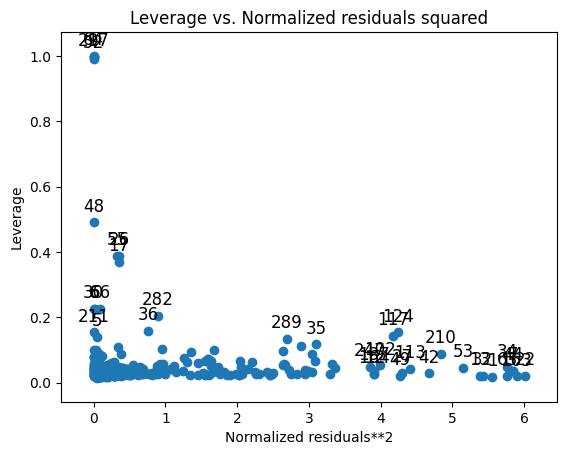

In [10]:
df.drop([8,86], inplace = True)
df.drop([131], inplace = True)
df.drop([228], inplace = True)
df.drop([186], inplace = True)
df.drop([10], inplace = True)

bestmodel = smf.ols(formula=f'DEATH_EVENT~ {formula}', data=df).fit()

print(bestmodel.summary())
sm.graphics.plot_leverage_resid2(bestmodel)

As you can see above, the graph changes a bit since we took out the last couple of points cause it adjusted to what we have now. But when you look at the summary, we can see those points  did have an impact, but it made it better, but a little bit from what we had originally, from .350 to .368,  which tells us that those points were important and had to be taken out to make our R-squared better 
    

So in summary, in this project I wanted to see what features seem important which each other by first doing a few and seeing if they were. We found out that the two features I looked into were not very strong in terms of the R-squared value. So I decided to test out the Death event with other predictors and see if they have a good, strong connection. From testing it with the maximization  of r-square value and the normalizing, we found  that the 3 predictors  did hold up. Finally,  we decided  to check if we could decide on some outliers and see if we get a stronger outcome. I managed to get  better results when I took out the two outliers and got a good bump in the r-square value. When I tried it again with more points, it  made  the results better  in the r-squre value in our model summary, showing that  more points can be taken out to make the r-s value better. After doing all of that for the 3 predictors show a strong showing for the death event feature in the dataset.